# Bank Marketing (Customer Subscription YES / NO) dataset

In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings # for ignoring any warnings
warnings.filterwarnings('ignore') # to ignore warnings
import seaborn as sb
sb.set(style='white', color_codes=True) # some styling parameters
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and reading data

train=pd.read_csv("bank_term-deposit_train.csv")
test=pd.read_csv("bank_term-deposit_test.csv")
print(train)
print(test)

          ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaig

In [3]:
# Checking columns in each dataset

print(train.columns)
print(test.columns)

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')
Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [4]:
# Checking datatypes in each dataset

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB
None
<class 'pandas.core.frame.DataFrame

In [5]:
# Checking datashape for each dataset

print(train.shape)
print(test.shape)

(31647, 18)
(13564, 17)


In [6]:
# Checking any missing values in each dataset

print(train.isnull().sum())
print(test.isnull().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64
ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


### Observations from above:

- There are no null / missing values present in the dataset
- TRAIN dataset has an additional 1 column (Subscribe) w.r.t. TEST dataset
- There are 17 columns which has same features in both datasets

## Data Visualization & EDA

- Using **_Univariate plots_**
- Using **_Multivariate plots_**
- Using **_Correlation Matrix_**

In [7]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [8]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


### _Univariate Analysis_

In [9]:
# Frequency of 'Subscribed' in the dataset

train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Text(0.5, 1.0, 'Subscribed count')

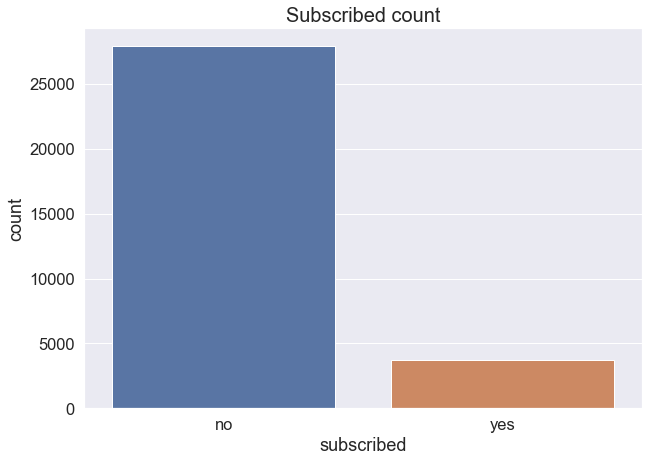

In [10]:
# Plotting the 'Subscribed' frequency

sb.set_context('paper')
sb.set(font_scale=1.5)
plt.figure(figsize=(10,7))
sb.countplot(data=train, x='subscribed')
plt.title("Subscribed count", fontsize=20) # title of plot; font size of title = 20

In [11]:
# Normalizing the 'Subscribed' data

train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

### Observations from above analysis:

- There are **3715** customers out of **31,647** who _HAVE subscribed_ to the term deposit
- Rest **27932** customers who _HAVE NOT subscribed_ to the term deposit
- _SUBSCRIBED %_ = **11.74%**
- _NON-SUBSCRIBED %_ = **88.26%**
- We will now perform analysis on AGE, JOB and MARTIAL status

Text(0.5, 1.0, 'Age count')

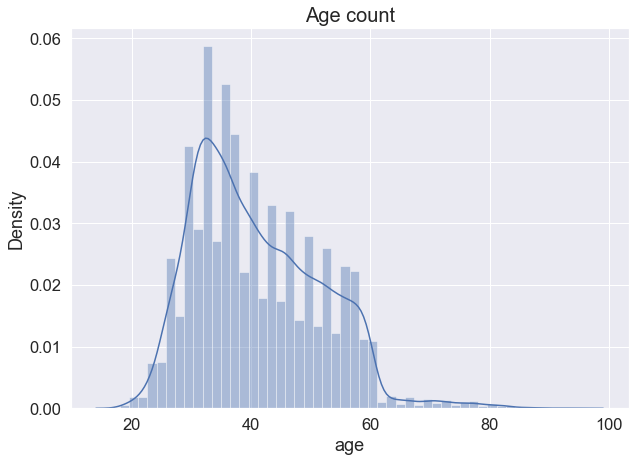

In [12]:
# Plotting 'Age' data

plt.figure(figsize=(10,7))
sb.distplot(train['age'])
plt.title("Age count", fontsize=20) # title of plot; font size of title = 20

### _We conclude_

- Most of the customers fall in the age group between **_25-62_**

In [13]:
# Frequency of 'Job' in the dataset

train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

Text(0.5, 1.0, 'Job count')

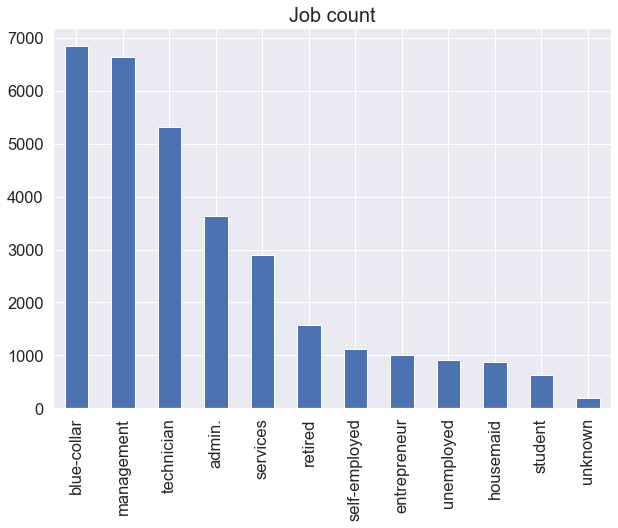

In [14]:
# Plotting the 'Job' frequency

sb.set_context('notebook')
sb.set(font_scale=1.5)
train['job'].value_counts().plot(kind='bar', figsize=(10,7))
plt.title("Job count", fontsize=20) # title of plot; font size of title = 20

### _We conclude:_

- Most of the customers belong to **blue-collar** job category
- The **students, housemaid** and **unemployed** are the least to make term deposits in general

In [15]:
# Frequency of 'Martial status' in the dataset

train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

Text(0.5, 1.0, 'Martial Status count')

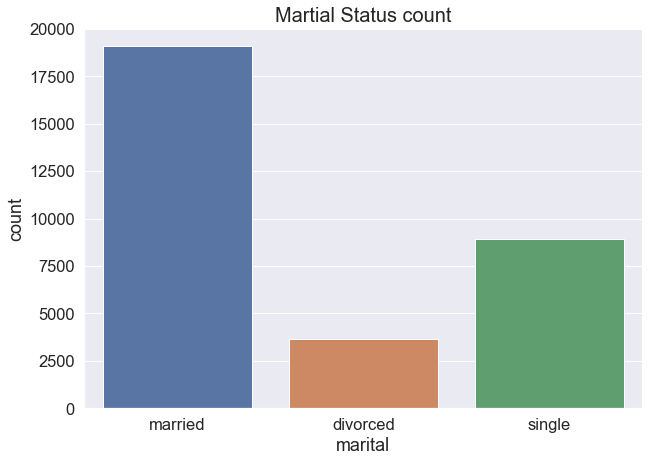

In [16]:
# Plotting the 'Martial status' frequency

plt.figure(figsize=(10,7))
sb.set_context('paper')
sb.set(font_scale=1.5)
sb.countplot(data=train, x='marital')
plt.title("Martial Status count", fontsize=20) # title of plot; font size of title = 20

Text(0.5, 1.0, 'Martial Status vs. Subscribed count')

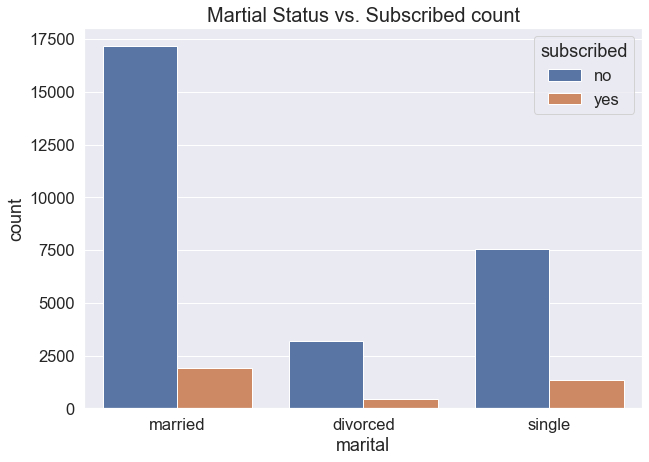

In [17]:
# Plotting the 'Martial status vs. Subscribed' frequency

plt.figure(figsize=(10,7))
sb.set_context('paper')
sb.set(font_scale=1.5)
sb.countplot(data=train, x='marital', hue='subscribed')
plt.title("Martial Status vs. Subscribed count", fontsize=20) # title of plot; font size of title = 20

### _We conclude:_

- There is a huge difference in customer term deposit subscription in **married** category
- The **singles** has good contribution to the term deposit

### _Bivariate Analysis_

In [18]:
# Frequency of 'Job vs. Subscribed' in the dataset

pd.crosstab(train['job'],train['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


Text(0.5, 1.0, 'Job vs. Subscribed plot')

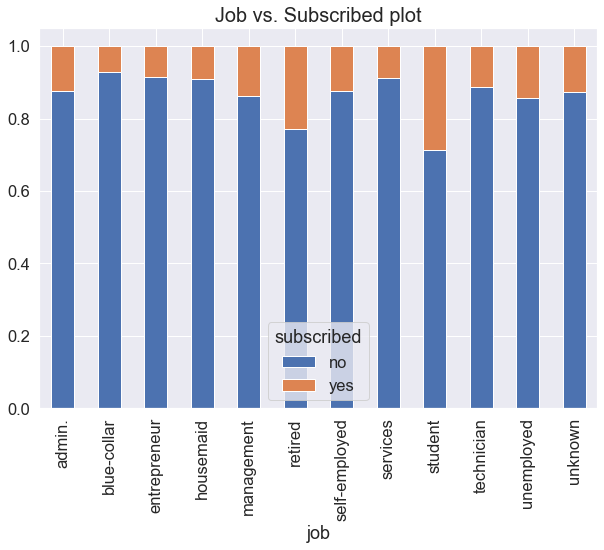

In [19]:
job=pd.crosstab(train['job'],train['subscribed'])
job_new=job.div(job.sum(1).astype(float), axis=0)
job_new.plot.bar(stacked=True,figsize=(10,7))
plt.title("Job vs. Subscribed plot", fontsize=20)

### _We conclude:_

- The **student** have good chances of subscribing the term deposit

In [20]:
# Frequency of 'Martial status vs. Subscribed' in the dataset

pd.crosstab(train['marital'],train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [21]:
marital=pd.crosstab(train['marital'], train['subscribed'])
marital_new=marital.div(marital.sum(1).astype(float), axis=0)
marital_new

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


Text(0.5, 1.0, 'Martial status vs. Subscribed plot')

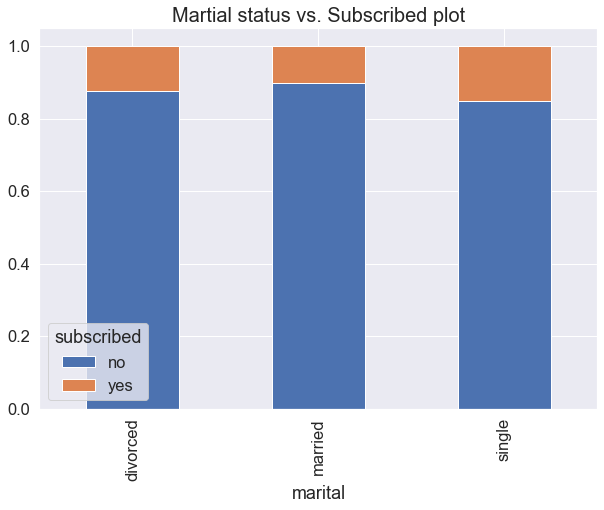

In [22]:
marital_new.plot.bar(stacked=True,figsize=(10,7))
plt.title("Martial status vs. Subscribed plot", fontsize=20)

### _We conclude:_

- The **martial** do not impact to the dataset term deposit

In [23]:
# Frequency of 'Default vs. Subscribed' in the dataset

pd.crosstab(train['default'],train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [24]:
default=pd.crosstab(train['default'], train['subscribed'])
default_new=default.div(default.sum(1).astype(float), axis=0)
default_new

subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


Text(0.5, 1.0, 'Default vs. Subscribed plot')

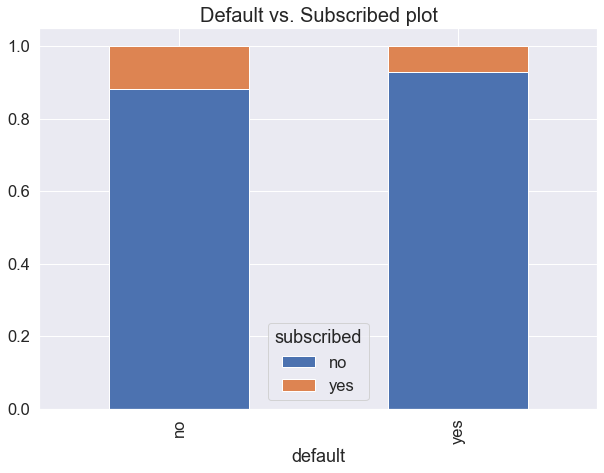

In [25]:
default_new.plot.bar(stacked=True, figsize=(10,7))
plt.title("Default vs. Subscribed plot", fontsize=20)

### _We conclude:_

- The **default** do impact to the dataset term deposit
- The customers with no default may opt for subscribtion for a term deposit
- We will now convert the categorical values into numerical values

In [26]:
# Converting target variables into 0 and 1

train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

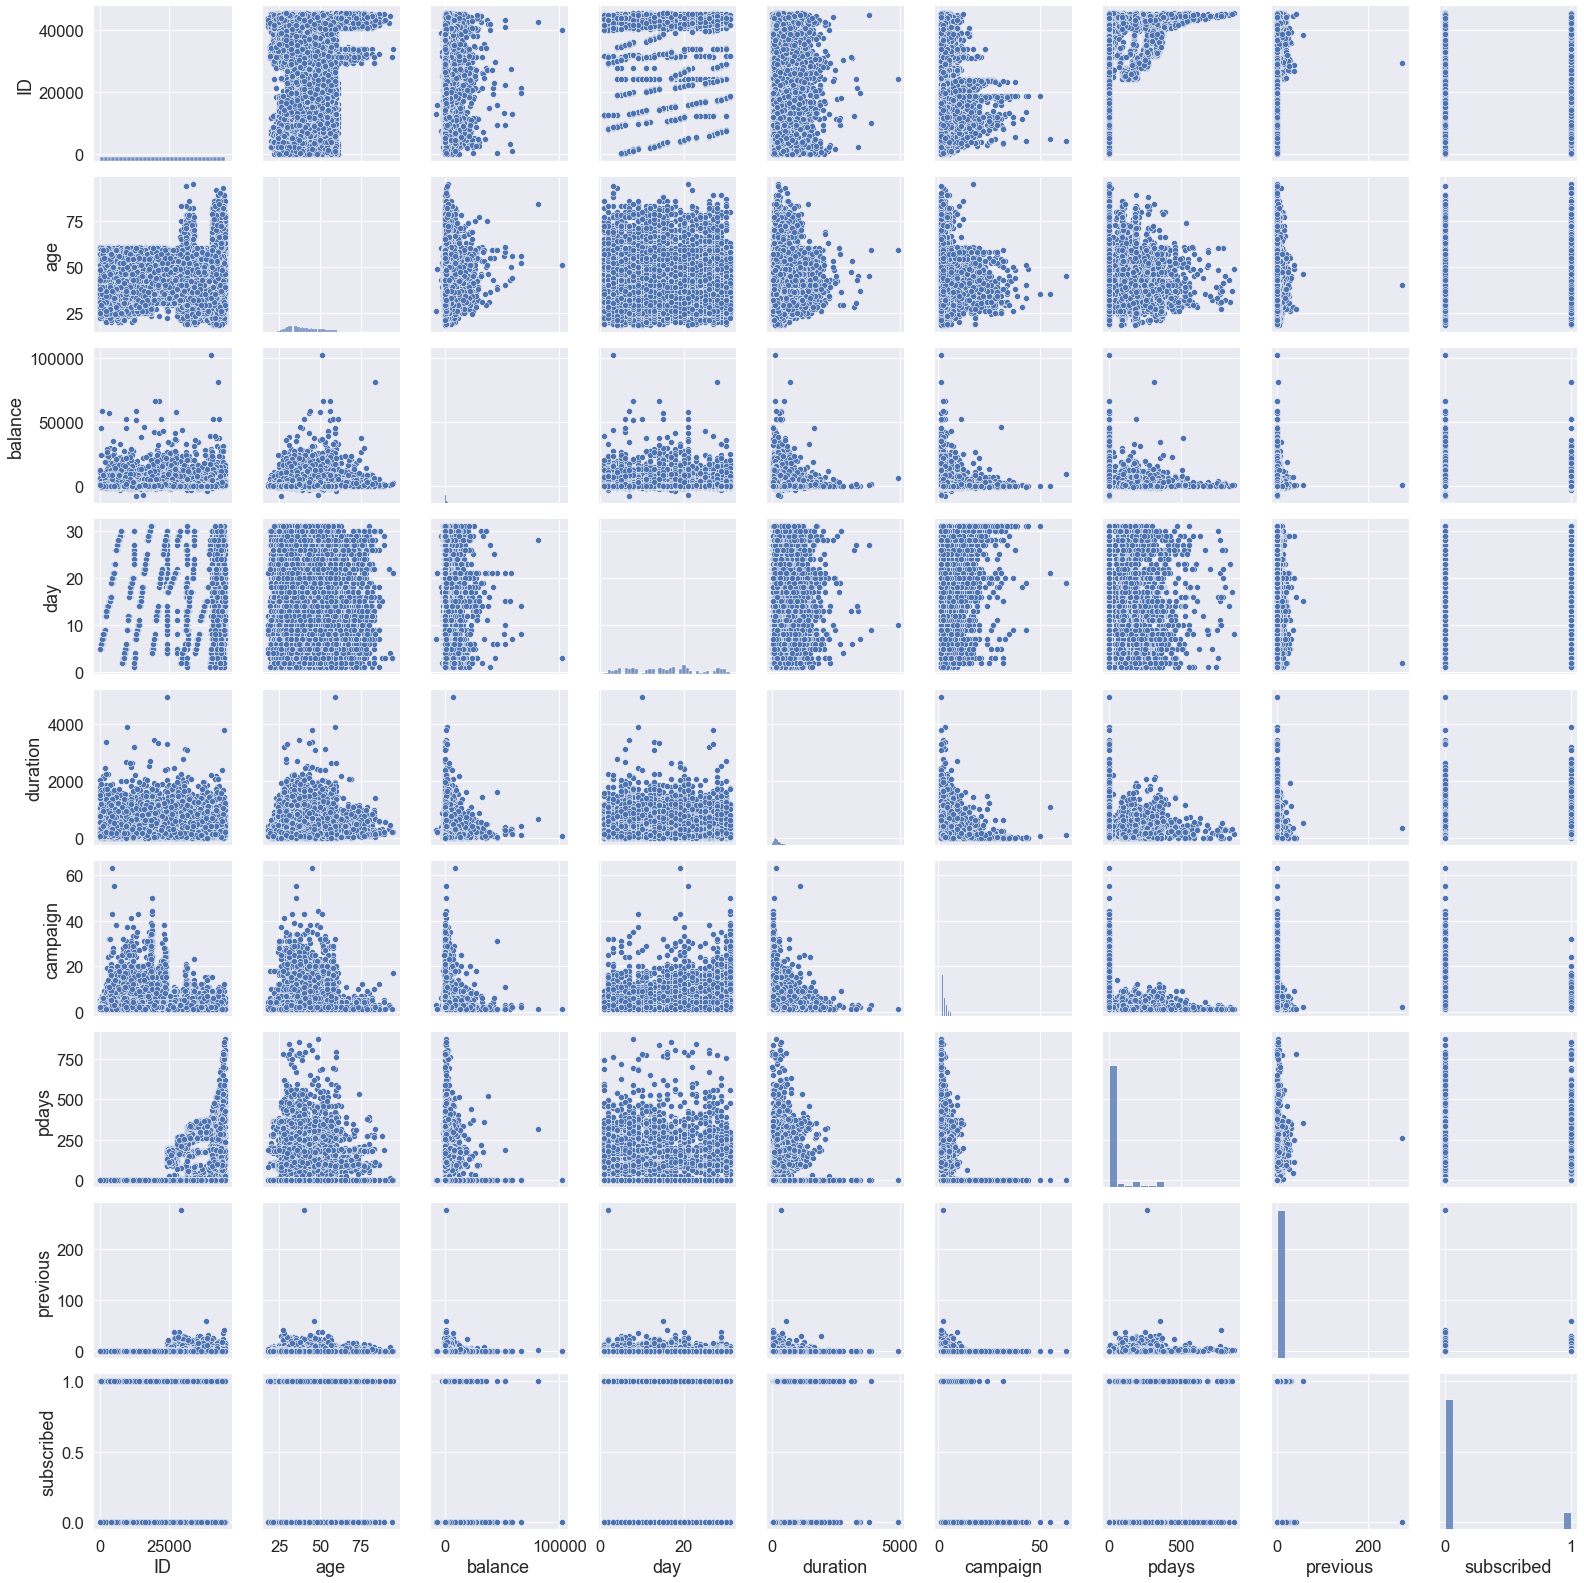

In [27]:
# Pairplot displaying all columns:

sb.pairplot(train) # displaying correlation DataFrame

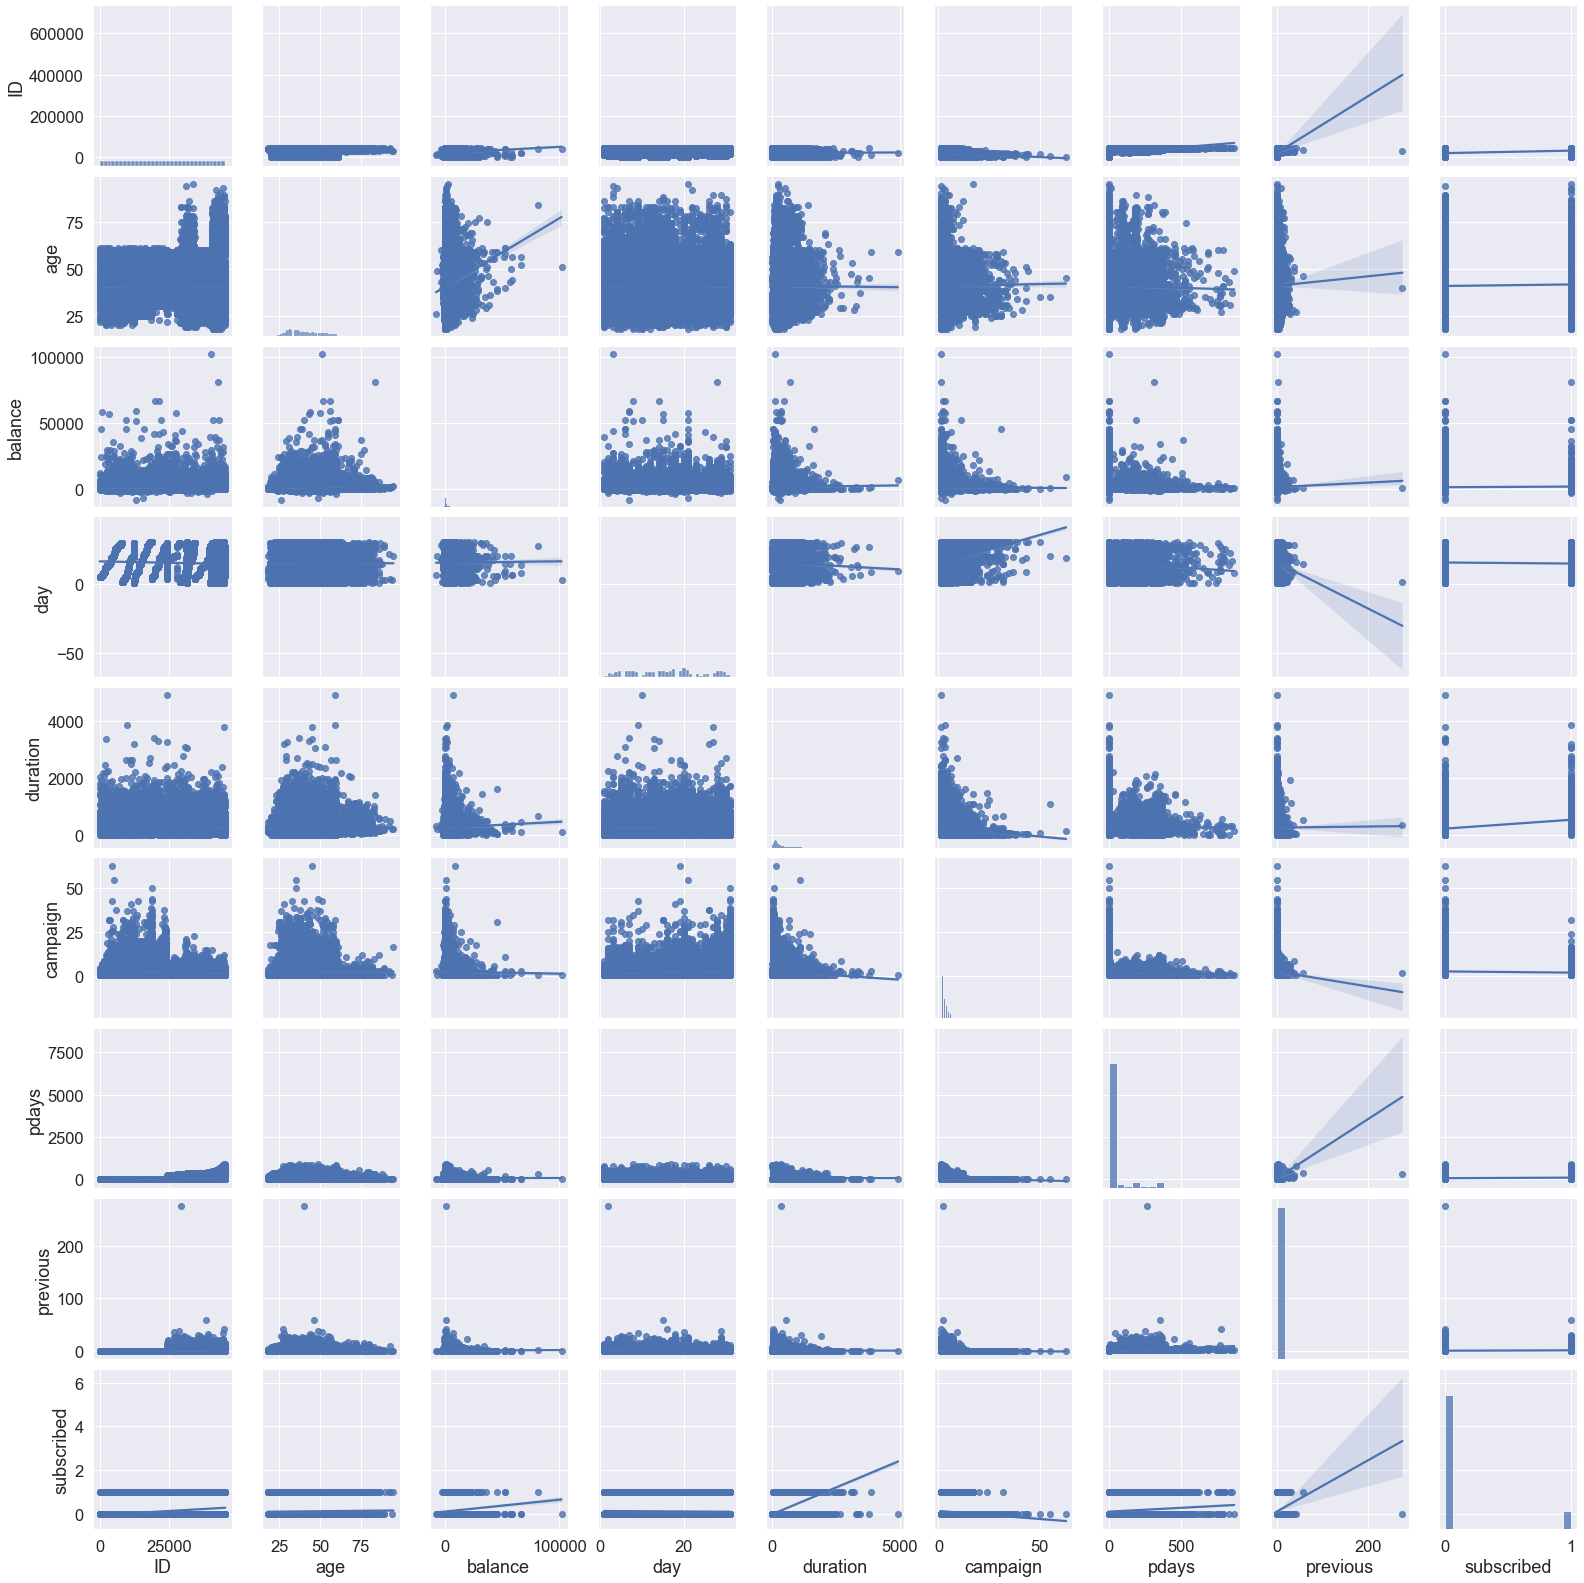

In [28]:
# Checking relation between all Attributes

sb.pairplot(train[['ID', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']], kind='reg')

## _Correlation Matrix_

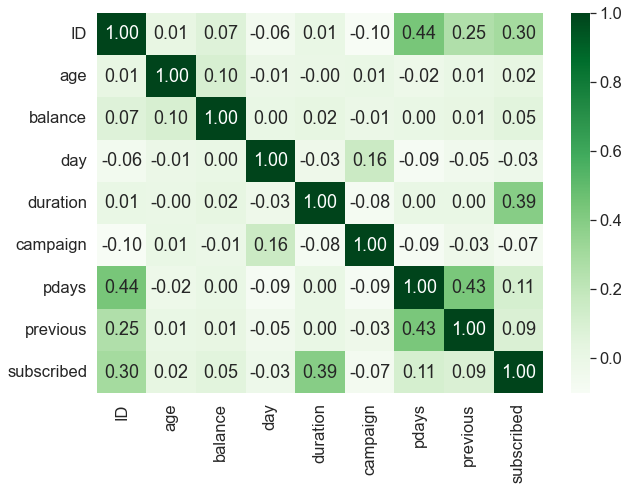

In [29]:
corr=train.corr() # to find the pairwise correlation of all columns
fig,ax=plt.subplots(figsize=(10,7))
sb.heatmap(corr,cmap='Greens',annot=True,fmt=".2f",ax=ax) # fmt is used to count until 2 decimal places
sb.set(font_scale=1) # font size = 1
plt.show()

### Observations from above Correlation data:

- If the correlation is **-ve** -- correlation is decreasing with the target variable
- If the correlation is **+ve** -- correlation is increasing with the target variable
- The **duration** is _+vely_ correlated to **subscribed**
- The **duration** in the dataset is considered as the _call data / call duration_. Hence, _the more the duration the higher the chances_ of customer subscribing the term deposit

## Proceeding with model building using essential ML libraries

In [30]:
target=train['subscribed']
train=train.drop('subscribed', axis=1)

In [31]:
# Generating dummy values on the train dataset

train=pd.get_dummies(train)
train

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,40178,53,380,5,438,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,19710,32,312,7,37,3,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,38556,57,225,15,22,7,337,12,0,0,...,0,0,1,0,0,0,1,0,0,0


In [32]:
# Importing essentital Machine Learning libraries

!pip install scikit-learn
!pip install xgboost
from sklearn.preprocessing import LabelEncoder # importing LabelEncoder
from sklearn.preprocessing import MinMaxScaler # importing MinMaxScaler
from sklearn.preprocessing import StandardScaler # importing StandardScaler
from sklearn.decomposition import PCA # importing Principal Component Analysis
from sklearn.linear_model import LinearRegression # importing LinearRegression
from sklearn.linear_model import LogisticRegression # importing LogisticRegression
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # importing KNeighborsClassifier
from sklearn.svm import SVC # importing Support Vector Machine
from sklearn.svm import LinearSVC # importing Linear Support Vector Machine
from sklearn.ensemble import RandomForestRegressor # importing RandomForestRegressor -- ensemble technique
from sklearn.ensemble import RandomForestClassifier # importing RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier # importing GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor
import xgboost as xgb # importing XGBoost
from xgboost import XGBClassifier # importing XGBClassifier

# Now importing r2_score, MSE, MSA, accuracy_score, confusion_matrix, classification_report below
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, mean_absolute_error, classification_report

# Now importing essential model selection techniques
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Observations from above:

- Since it's a classification problem. We will try to identify the best model fit with the highest accuracy score
- We will split the data into 80-20% (80% training and 20% testing/validating)

In [33]:
X_train, X_val, y_train, y_val=train_test_split(train, target, test_size=0.2, random_state=42)

## _Logistic Regression_

In [34]:
%%time
log_reg=LogisticRegression() # creating an object
log_reg.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 688 ms
Wall time: 461 ms


LogisticRegression()

In [35]:
pred=log_reg.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.8906793048973144

## _Decision Tree Algorithm_

In [36]:
%%time
dta=DecisionTreeClassifier() # creating an object
dta.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 484 ms
Wall time: 495 ms


DecisionTreeClassifier()

In [37]:
pred=dta.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.8854660347551343

## _Random Forest Algorithm_

In [38]:
%%time
rf=RandomForestClassifier() # creating an object
rf.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 5.28 s
Wall time: 5.36 s


RandomForestClassifier()

In [39]:
pred=rf.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.9075829383886256

## _K-Nearest Neighbors_

In [40]:
%%time
knn=KNeighborsClassifier() # creating an object
knn.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 15.6 ms
Wall time: 9.01 ms


KNeighborsClassifier()

In [41]:
pred=knn.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.8988941548183255

## _SVC Classifier (Non-Linear Kernal)_

In [42]:
%%time
svc=SVC() # creating an object
svc.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 14.5 s
Wall time: 14.7 s


SVC()

In [43]:
pred=svc.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.8845181674565561

## _SVC Classifier (Linear Kernal)_

In [44]:
%%time
svc=LinearSVC() # creating an object
svc.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 4.16 s
Wall time: 4.24 s


LinearSVC()

In [45]:
pred=svc.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.8837282780410742

## _Gradient Descent Algorithm_

In [46]:
%%time
gd=GradientBoostingClassifier() # creating an object
gd.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 10.2 s
Wall time: 10.3 s


GradientBoostingClassifier()

In [47]:
pred=gd.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.9097946287519747

## _XGBoost_

In [48]:
%%time
xgb=XGBClassifier() # creating an object
xgb.fit(X_train, y_train) # fitting the data into the model

CPU times: total: 21.8 s
Wall time: 3.47 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [49]:
pred=xgb.predict(X_val) # making predictions on validation set
accuracy_score(y_val,pred) # checking the accuracy score

0.9097946287519747

### From above Machine Learning models, we can conclude:


- **_Logistic Regression_**

>**_Train:_** 0.8906793048973144

- **_Decision Tree Alogrithm_**

>**_Train:_** 0.8867298578199052

- **_Random Forest Alogrithm_**

>**_Train:_** 0.9086887835703001

- **_K-Nearest Neighbors_**

>**_Train:_** 0.8988941548183255

- **_SVC Classifier (Non-Linear Kernal)_**

>**_Train:_** 0.8845181674565561

- **_SVC Classifier (Linear Kernal)_**

>**_Train:_** 0.7450236966824645

- **_Gradient Descent Algorithm_**

>**_Train:_** 0.9096366508688783

- **_XGBoost Algorithm_**

>**_Train:_** 0.9097946287519747



- >**_XGBoost algorithm_** is best suited from the above training dataset. Hence, we will apply **_XGBoost Algorithm_** to the test dataset

In [50]:
test=pd.get_dummies(test)
test

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,45,28,148,4,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13560,11743,54,2281,20,158,1,-1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
13561,28292,35,285,29,136,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,45163,29,464,9,208,2,91,3,1,0,...,0,0,0,1,0,0,0,0,1,0


In [51]:
test_pred=xgb.predict(test)
test_pred

array([0, 0, 0, ..., 0, 1, 0])

In [52]:
final_csv=pd.DataFrame()

In [53]:
final_csv['ID']=test['ID']
final_csv['subscribed']=test_pred

In [54]:
final_csv['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int32

In [55]:
# Converting target variables into YES and NO

final_csv['subscribed'].replace(0,'no',inplace=True)
final_csv['subscribed'].replace(1,'yes',inplace=True)
final_csv

,ID,subscribed
0,38441,no
1,40403,no
2,3709,no
3,37422,no
4,12527,no
...,...,...
13559,23465,no
13560,11743,no
13561,28292,no
13562,45163,yes


In [56]:
final_csv.to_csv('final_csv file.csv', header=True, index=False)